<a href="https://colab.research.google.com/github/weisurya/fastai-practical-deep-learning-for-coders/blob/main/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 19.2MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 1.2MB 48.9MB/s 
     |████████████████████████████████| 194kB 37.1MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), label_func=is_cat,
    valid_pct=.2, seed=42, item_tfms=Resize(234))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.163873,0.103864,0.034506,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.048062,0.137082,0.039242,01:02


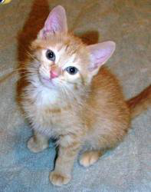

In [6]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [8]:
img = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(img)

print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


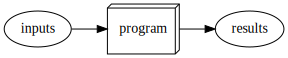

In [11]:
gv('''
program[shape=box3d width=1 height=.7]
inputs -> program -> results
''')

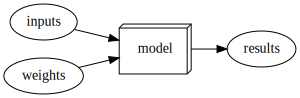

In [12]:
gv('''
model[shape=box3d width=1 height=.7]
inputs -> model -> results;
weights -> model
''')

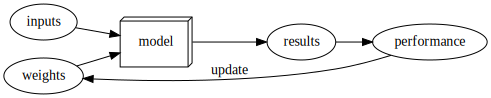

In [20]:
gv('''
ordering=in
model[shape=box3d width=1 height=.7]
inputs -> model -> results; 
weights -> model;
results -> performance
performance -> weights[constraint=false label=update]
''')


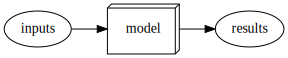

In [21]:
gv('''
model[shape=box3d width=1 height=.7]
inputs -> model -> results
''')

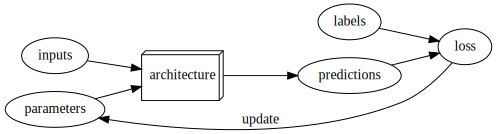

In [22]:
gv('''
ordering=in
model[shape=box3d width=1 height=.7 label=architecture]
inputs -> model -> predictions;
parameters -> model;
labels -> loss
predictions -> loss
loss -> parameters[constraint=false label=update]
''')

In [26]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.475350,2.241014,00:01


epoch,train_loss,valid_loss,time
0,1.844998,1.901310,00:01
1,1.588142,1.800624,00:01
2,1.423456,1.391241,00:01
3,1.260209,1.321620,00:01
4,1.138662,1.178722,00:01
5,1.031019,1.127426,00:01
6,0.938619,1.130650,00:01
7,0.865730,1.125461,00:01


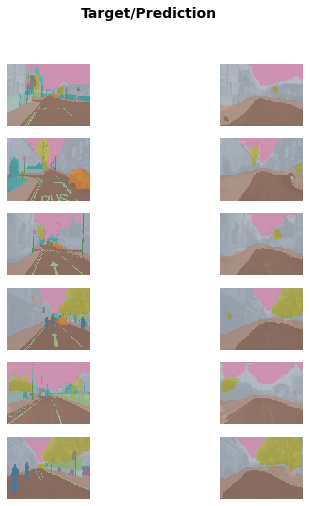

In [27]:
learn.show_results(max_n=6, figsize=(7,8))

In [28]:
from fastai.text.all import *

In [29]:
dls = TextDataLoaders.from_folder(
    untar_data(URLs.IMDB), valid='test',
)

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.466080,0.419568,0.810840,03:49


epoch,train_loss,valid_loss,accuracy,time
0,0.307181,0.237618,0.904880,07:24
1,0.241654,0.198775,0.923240,07:25
2,0.189484,0.183117,0.930400,07:26
3,0.145363,0.185453,0.931560,07:25


In [34]:
learn.predict("I don't know why but I think this movie is good yet at the same time not so good")

('pos', tensor(1), tensor([0.1580, 0.8420]))

In [31]:
from fastai.tabular.all import *

In [36]:
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(
    path/'adult.csv', path=path, y_names="salary",
    cat_names=['workclass', 'education', 'marital-status',
               'occupation', 'relationship', 'race'],
    cont_names=['age', 'fnlwgt', 'education-num'],    
    procs=[Categorify, FillMissing, Normalize]
)

learn = tabular_learner(dls, metrics=accuracy)

In [37]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.363705,0.363305,0.831081,00:04
1,0.359703,0.351759,0.838145,00:04
2,0.348495,0.348902,0.835995,00:04


In [38]:
from fastai.collab import *

In [39]:
path = untar_data(URLs.ML_SAMPLE)

dls = CollabDataLoaders.from_csv(path/'ratings.csv')

learn = collab_learner(dls, y_range=(0.5, 5.5))

In [40]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.509951,1.383366,00:00


epoch,train_loss,valid_loss,time
0,1.382265,1.322423,00:00
1,1.266359,1.137417,00:00
2,1.018767,0.837872,00:00
3,0.801264,0.705987,00:00
4,0.702424,0.673719,00:00
5,0.651609,0.663417,00:00
6,0.646053,0.658219,00:00
7,0.623419,0.656007,00:00
8,0.600937,0.655357,00:00
9,0.620194,0.655151,00:00


In [42]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,9.0,6.0,4.0,3.564723
1,38.0,33.0,4.0,3.356816
2,32.0,72.0,5.0,3.640307
3,82.0,12.0,5.0,2.921741
4,59.0,52.0,4.0,4.297348
5,53.0,93.0,5.0,4.662980
6,30.0,21.0,5.0,3.833596
7,67.0,90.0,3.5,3.229027
8,75.0,63.0,3.0,4.569293
